In [2]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np

In [3]:
xs = np.linspace(-20, 20)

In [4]:
xs

array([-20.        , -19.18367347, -18.36734694, -17.55102041,
       -16.73469388, -15.91836735, -15.10204082, -14.28571429,
       -13.46938776, -12.65306122, -11.83673469, -11.02040816,
       -10.20408163,  -9.3877551 ,  -8.57142857,  -7.75510204,
        -6.93877551,  -6.12244898,  -5.30612245,  -4.48979592,
        -3.67346939,  -2.85714286,  -2.04081633,  -1.2244898 ,
        -0.40816327,   0.40816327,   1.2244898 ,   2.04081633,
         2.85714286,   3.67346939,   4.48979592,   5.30612245,
         6.12244898,   6.93877551,   7.75510204,   8.57142857,
         9.3877551 ,  10.20408163,  11.02040816,  11.83673469,
        12.65306122,  13.46938776,  14.28571429,  15.10204082,
        15.91836735,  16.73469388,  17.55102041,  18.36734694,
        19.18367347,  20.        ])

In [5]:
f = 5.
zs = (1 / (4.*f))*(xs)**2


<IPython.core.display.Javascript object>


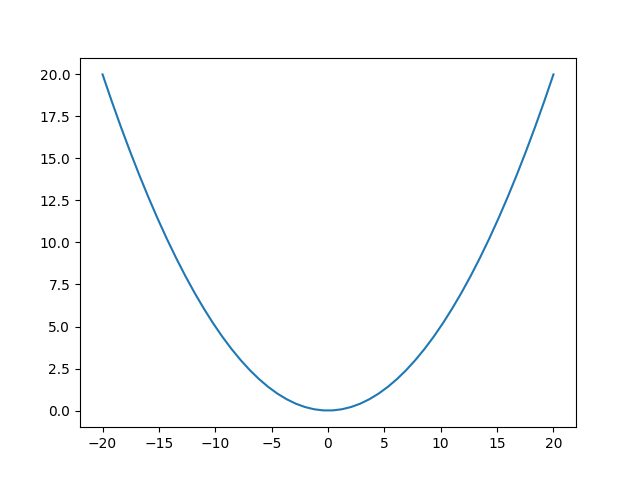

In [6]:
fig = plt.figure()
ax = fig.gca()
ax.plot(xs, zs)

In [10]:
v1 = 10.
v2 = 10.
zs2 = ((1/(4.*f))*(xs - v1)**2) + v2

<IPython.core.display.Javascript object>


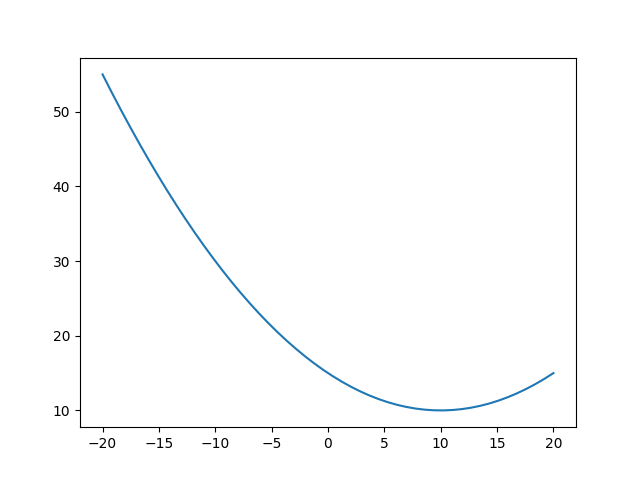

In [11]:
fig = plt.figure()
ax = fig.gca()
ax.plot(xs, zs2)

In [12]:
ys = np.linspace(-20., 20.)
xs2d, ys2d = np.meshgrid(xs, ys)
zs2d = (1 / (4.*f))*(xs2d)**2 +  (1 / (4.*f))*(ys2d)**2
zs2d.shape

(50, 50)

<IPython.core.display.Javascript object>


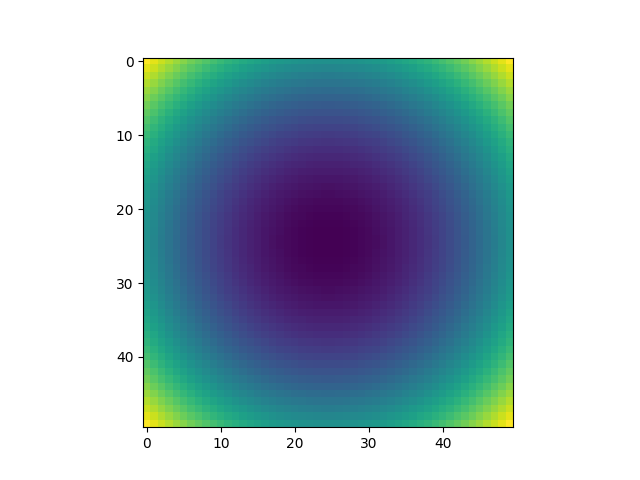

In [13]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = fig.gca()
ax.imshow(zs2d)

<IPython.core.display.Javascript object>


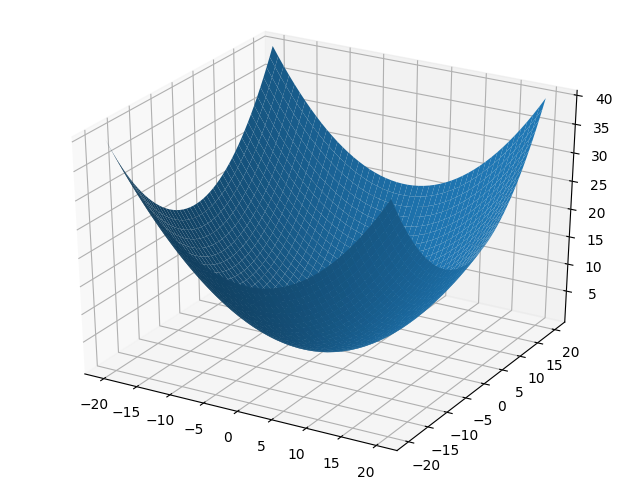

In [14]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, zs2d)

In [15]:
v2 = 10.
v1x = v1y = 7.5
zs2d2 = (1 / (4.*f))*(xs2d - v1x)**2 + (1 / (4.*f))*(ys2d - v1y)**2 + v2;

<IPython.core.display.Javascript object>


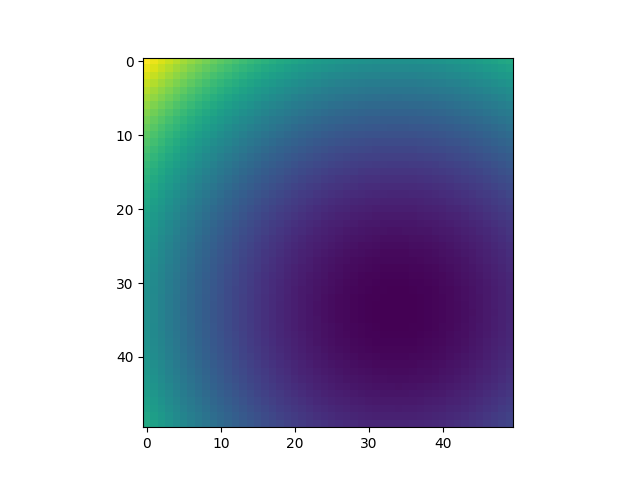

In [16]:
fig = plt.figure()
ax = fig.gca()
ax.imshow(zs2d2)

<IPython.core.display.Javascript object>


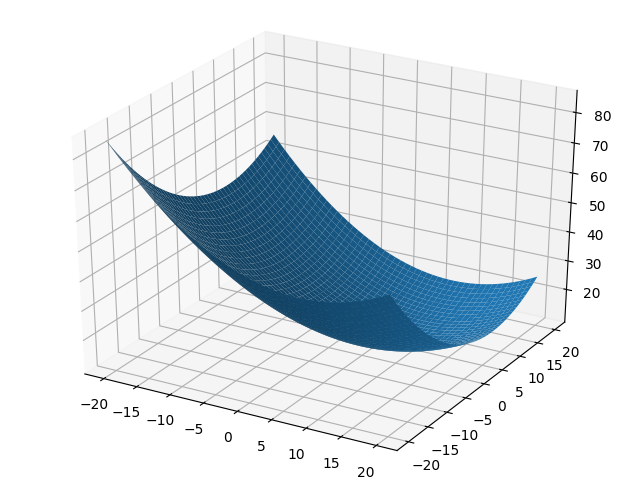

In [17]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, zs2d2)

In [14]:
np.rand?


Object `np.rand` not found.


In [18]:
data = zs2d2 + np.random.rand(50, 50)

<IPython.core.display.Javascript object>


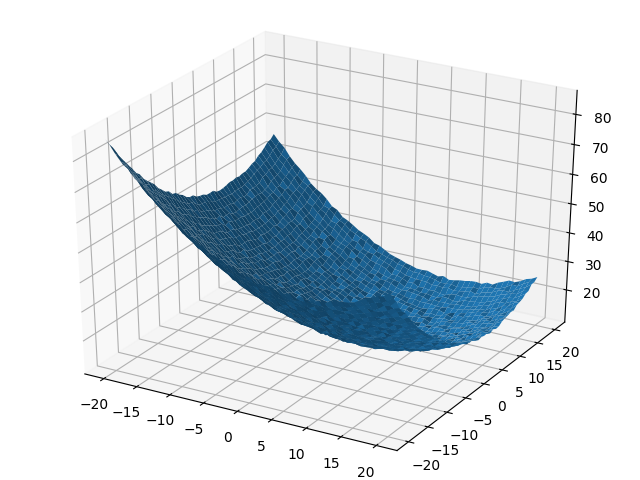

In [19]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, data)

<IPython.core.display.Javascript object>


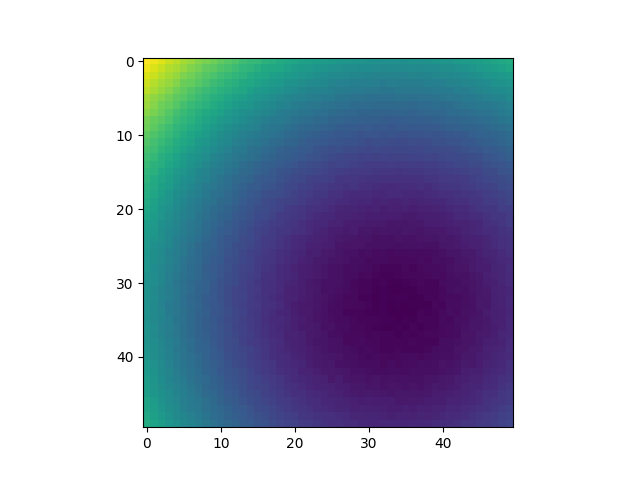

In [17]:
fig = plt.figure()
ax = fig.gca()
ax.imshow(data)

## Simple 1D Parabola Fit

In [20]:
focal = 5.
data1D = (1 / (4.*focal))*(xs)**2 + (np.random.rand(50))
data1D.shape

(50,)

<IPython.core.display.Javascript object>


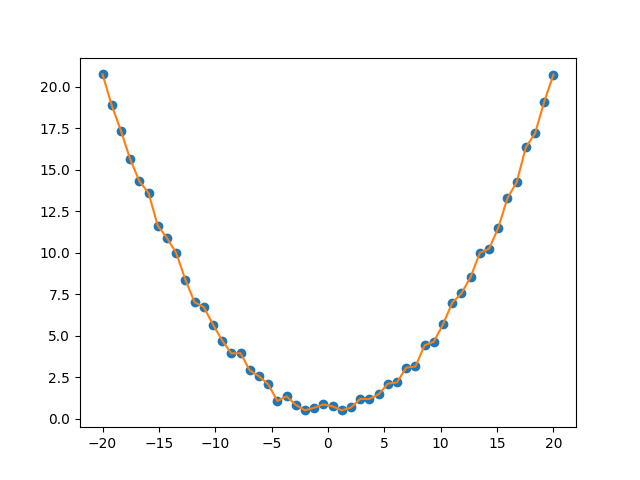

In [21]:
fig = plt.figure()
ax = fig.gca()
ax.plot(xs, data1D, 'o', xs, data1D)

In [22]:
def fun(coeffs, xdata):
    return (1 / (4.*coeffs[0]))*(xdata)**2

In [23]:
def errfun(coeffs, xdata, ydata):
    return fun(coeffs, xdata) - ydata

True
Both `ftol` and `xtol` termination conditions are satisfied.
6
[4.79620998]


<IPython.core.display.Javascript object>


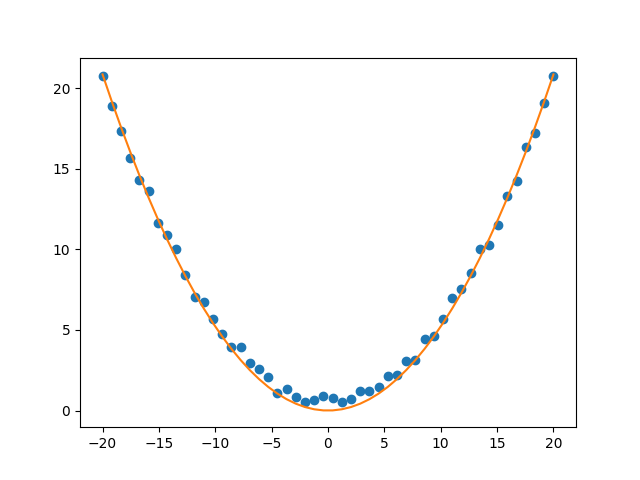

In [24]:
from scipy.optimize import least_squares
#r = least_squares(errfun, [3.5], args=(xs, data1D), ftol=1e-15)
r = least_squares(errfun, [3.5], args=(xs, data1D))
#print r
print r.success
print r.message
print r.nfev
print r.x
fittedFocus = r.x
fittedData = fun([fittedFocus], xs)
fig = plt.figure()
ax = fig.gca()
ax.plot(xs, data1D, 'o', xs, fittedData)


## Simple 2D Parabola Fitting


<IPython.core.display.Javascript object>


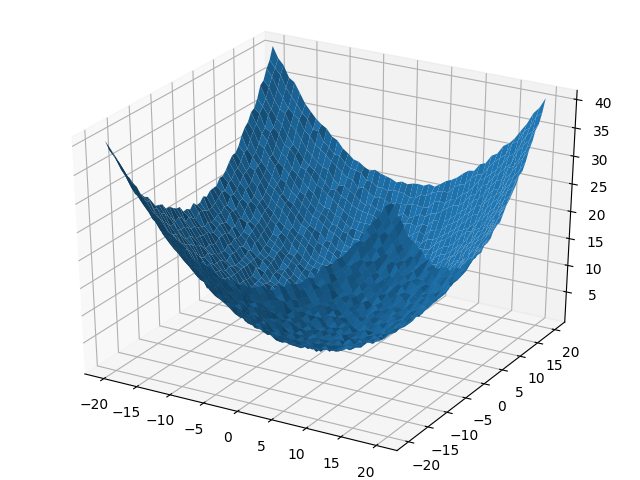

In [25]:
xs2d, ys2d = np.meshgrid(xs, ys)
data2D = (1 / (4.*f))*(xs2d)**2 +  (1 / (4.*f))*(ys2d)**2 + np.random.rand(50, 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, data2D)


In [26]:
def fun(coeffs, xdata, ydata):
    return (1 / (4.*coeffs[0]))*(xdata)**2 + (1 / (4.*coeffs[0]))*(ydata)**2

In [27]:
def errfun(coeffs, xdata, ydata, zdata):
    return fun(coeffs, xdata, ydata) - zdata

True
Both `ftol` and `xtol` termination conditions are satisfied.
6
[4.87450463]


<IPython.core.display.Javascript object>


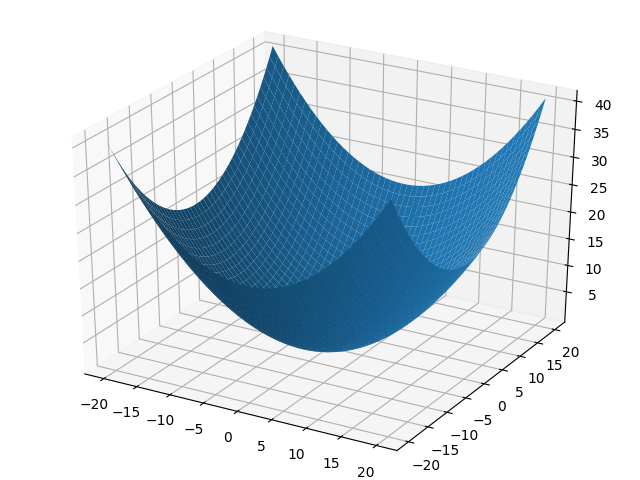

In [28]:
r = least_squares(errfun, [3.5], args=(xs2d.flatten(), ys2d.flatten(), data2D.flatten()))
#print r
print r.success
print r.message
print r.nfev
print r.x
fittedFocus = r.x
fittedData = fun([fittedFocus], xs2d, ys2d)
fig = plt.figure()
#ax = fig.gca()
#ax.plot(xs, data1D, 'o', xs, fittedData)
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, fittedData)

<IPython.core.display.Javascript object>


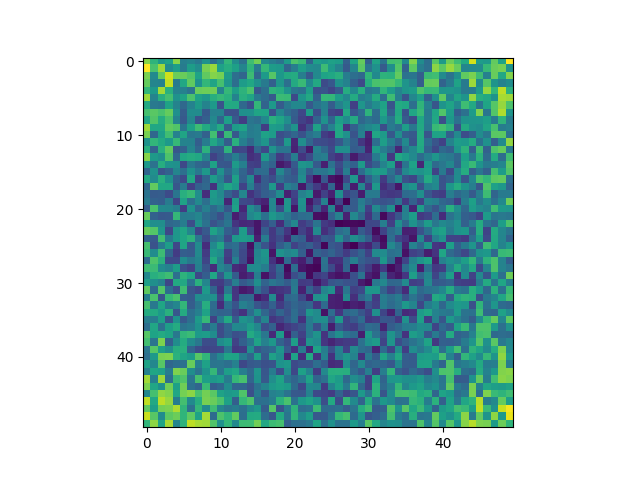

In [29]:
residuals = fittedData - data2D
fig = plt.figure()
ax = fig.gca()
ax.imshow(residuals)


## 2D Parabola Fitting with vertices

<IPython.core.display.Javascript object>


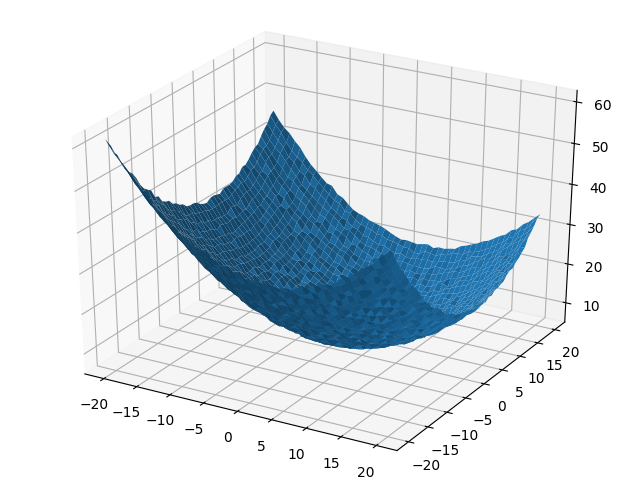

In [30]:
xs2d, ys2d = np.meshgrid(xs, ys)
v1x = 3.0
v1y = 4.0
v2 = 6.0
data2D = (1 / (4.*f))*(xs2d  - v1x)**2 +  (1 / (4.*f))*(ys2d - v1y)**2 + v2 + np.random.rand(50, 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, data2D)

In [31]:
def fun(coeffs, xdata, ydata):
    f = coeffs[0]
    v1x = coeffs[1]
    v1y = coeffs[2]
    v2 = coeffs[3]
    return (1 / (4.*f))*(xdata - v1x)**2 + (1 / (4.*f))*(ydata - v1y)**2 + v2

In [32]:
def errfun(coeffs, xdata, ydata, zdata):
    return fun(coeffs, xdata, ydata) - zdata

In [33]:
r = least_squares(errfun, [3.5, 2.0, 2.0, 2.0], args=(xs2d.flatten(), ys2d.flatten(), data2D.flatten()))
#print r
print r.success
print r.message
print r.nfev
print r.x

True
Both `ftol` and `xtol` termination conditions are satisfied.
6
[4.99880814 2.99610325 3.99905836 6.4891132 ]


<IPython.core.display.Javascript object>


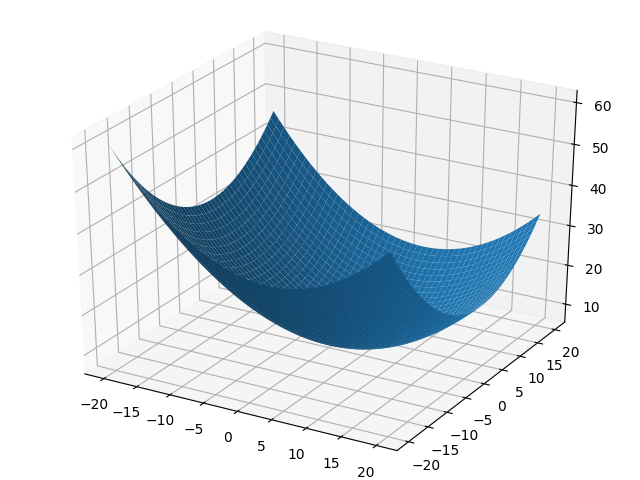

In [34]:
fittedFocus = r.x
fittedData = fun(r.x, xs2d, ys2d)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, fittedData)

<IPython.core.display.Javascript object>


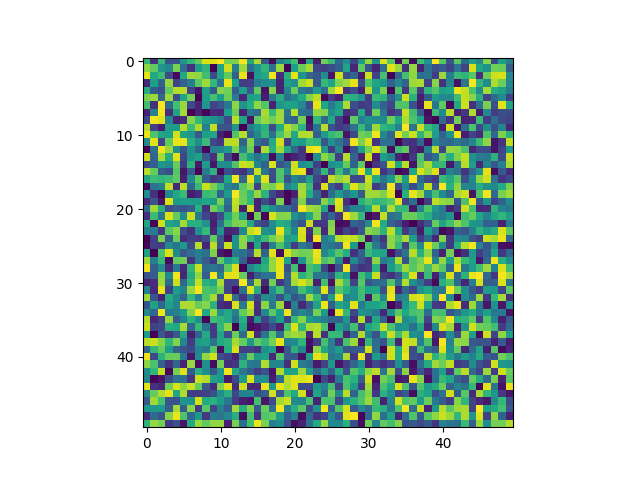

In [35]:
residuals = fittedData - data2D
fig = plt.figure()
ax = fig.gca()
ax.imshow(residuals)

In [34]:
np.max(residuals)

0.5089522646403211

## 2D Rotated Parabola


In [35]:
xs2d, ys2d = np.meshgrid(xs, ys)
v1x = 0.0
v1y = 0.0
v2 = 0.0
data2D = (1 / (4.*f))*(xs2d  - v1x)**2 +  (1 / (4.*f))*(ys2d - v1y)**2 + (2*v2)


In [36]:
# these are andrew's functions
def rotMatrixX(theta):
    x1 = [1., 0., 0.]
    x2 = [0., np.cos(theta), -np.sin(theta)]
    x3 = [0., np.sin(theta), np.cos(theta)]

    return np.array([x1, x2, x3]) 

def rotMatrixY(theta):
 
    x1 = [np.cos(theta), 0., np.sin(theta)]
    x2 = [0., 1., 0.]
    x3 = [-np.sin(theta), 0., np.cos(theta)]

    return np.array([x1, x2, x3])

def rotMatrixZ(theta):
    return np.array([[1., 0., 0.],[0., 1., 0.], [0., 0., 1.]])   

In [37]:
def getRotMatrix(pitch, roll, yaw):
    return np.dot(rotMatrixX(pitch), np.dot(rotMatrixY(roll), rotMatrixZ(yaw)))


In [38]:
# hmm, but I'm not understanding something
deg45 = np.pi / 2.
rotMatrix = getRotMatrix(deg45, 0, 0)
#xs2dRot = np.dot(xs2d.flatten(), np.dot([1., 0., 0.], rotMatrix))
#xs2dRot = xs2d * rotMatrix

In [39]:
# try a different approach.  First, just rotation about x:
# Y = y*cos(theta) - z*sin(theta);
# Z = y*sin(theta) + z*cos(theta);
zs2d = data2D
ys2dRot = ys2d*np.cos(deg45) - zs2d*np.sin(deg45)
zs2dRot = ys2d*np.sin(deg45) + zs2d*np.cos(deg45)
xs2dRot = xs2d

<IPython.core.display.Javascript object>


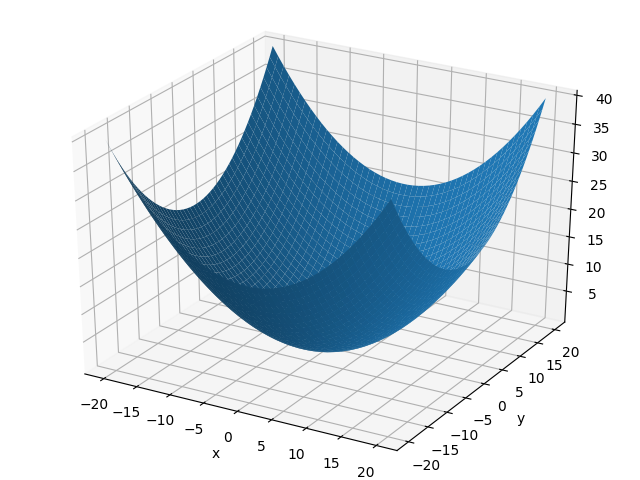

Text(0.5,0,'y')

In [40]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, zs2d)
plt.xlabel("x")
plt.ylabel("y")


<IPython.core.display.Javascript object>


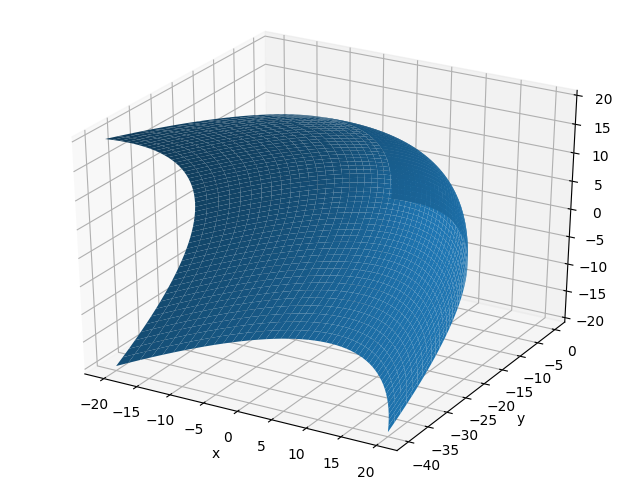

Text(0.5,0,'y')

In [41]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2dRot, ys2dRot, zs2dRot)
plt.xlabel("x")
plt.ylabel("y")

In [42]:
def rotate(x, y, z, aroundXrads, aroundYrads):
    # first, around x
    # x = x
    yRot = y*np.cos(aroundXrads) - z*np.sin(aroundXrads)
    zRot = y*np.sin(aroundXrads) + z*np.cos(aroundXrads)
    
    # then around y
    xRot = x*np.cos(aroundYrads) + zRot*np.sin(aroundYrads);
    # y = y;
    zRot = zRot*np.cos(aroundYrads) - x*np.sin(aroundYrads);
    return xRot, yRot, zRot

def rotateAroundX(x, y, z, aroundXrads):
    yRot = y*np.cos(aroundXrads) - z*np.sin(aroundXrads)
    zRot = y*np.sin(aroundXrads) + z*np.cos(aroundXrads)    
    return x, yRot, zRot

def rotateAroundY(x, y, z, aroundYrads):
    xRot = x*np.cos(aroundYrads) + z*np.sin(aroundYrads);
    zRot = z*np.cos(aroundYrads) - x*np.sin(aroundYrads);
    return xRot, y, zRot
    

In [43]:
# test this gives same result as above
# xs2dRot, ys2dRot, zs2dRot = rotate(xs2d, ys2d, zs2d, np.pi/2., np.pi/2.)
xs2dRot, ys2dRot, zs2dRot = rotateAroundX(xs2d, ys2d, zs2d, np.pi/2.)
xs2dRot, ys2dRot, zs2dRot = rotateAroundY(xs2dRot, ys2dRot, zs2dRot, np.pi/2.)


<IPython.core.display.Javascript object>


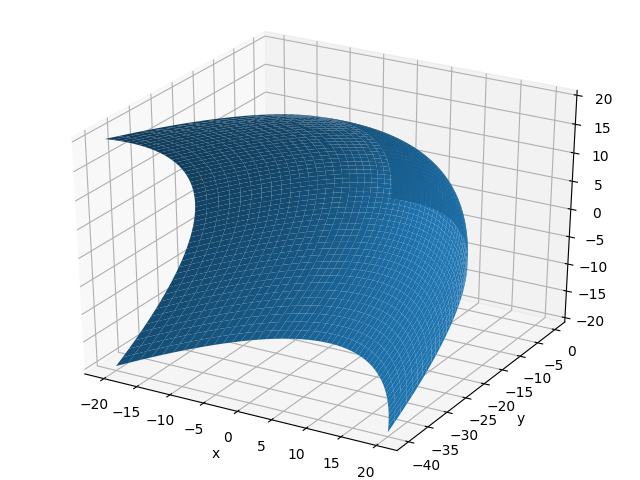

Text(0.5,0,'y')

In [44]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2dRot, ys2dRot, zs2dRot)
plt.xlabel("x")
plt.ylabel("y")

In [45]:
testX = np.array([1.,2.,3.])
testY = np.array([1.,2.,3.])
testZ = np.array([1.,2.,3.])
#testX2, testY2, testZ2 = rotate(testX, testY, testZ, 0., 0.)
print rotate(testX, testY, testZ, np.pi/2., np.pi/2.)
testX2, testY2, testZ2 = rotateAroundX(testX, testY, testZ, np.pi/2.)
print testX2, testY2, testZ2
print rotateAroundY(testX2, testY2, testZ2, np.pi/2.)


(array([1., 2., 3.]), array([-1., -2., -3.]), array([-1., -2., -3.]))
[1. 2. 3.] [-1. -2. -3.] [1. 2. 3.]
(array([1., 2., 3.]), array([-1., -2., -3.]), array([-1., -2., -3.]))


In [46]:
testX2D, testY2D = np.meshgrid(testX, testY)
testZ2D = testX2D
testX2D2, testY2D2, testZ2D2 = rotate(testX2D, testY2D, testZ2D, np.pi/2., 0.)
#testX2D2, testY2D2, testZ2D2 = rotateAroundX(testX2D, testY2D, testZ2D, np.pi/2.)
print testX2D2, testY2D2, testZ2D2
#print rotateAroundY(testX2D2, testY2D2, testZ2D2, 0.)

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]] [[-1. -2. -3.]
 [-1. -2. -3.]
 [-1. -2. -3.]] [[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


<IPython.core.display.Javascript object>


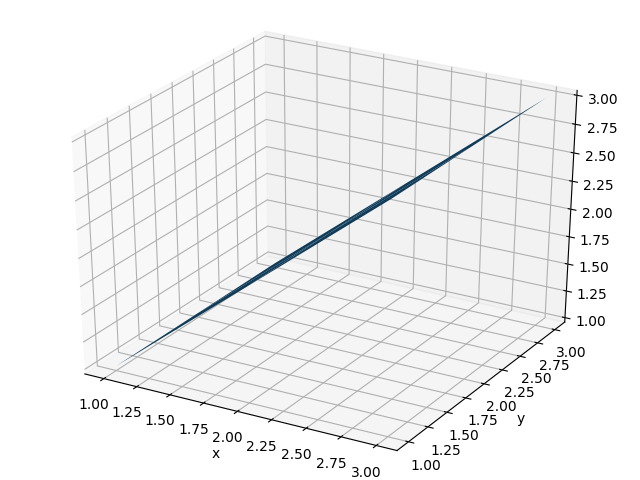

Text(0.5,0,'y')

In [47]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(testX2D, testY2D, testZ2D)
plt.xlabel("x")
plt.ylabel("y")

/data/sandboxes/pmargani/lassi-analysis/pmargani_lassi_env/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


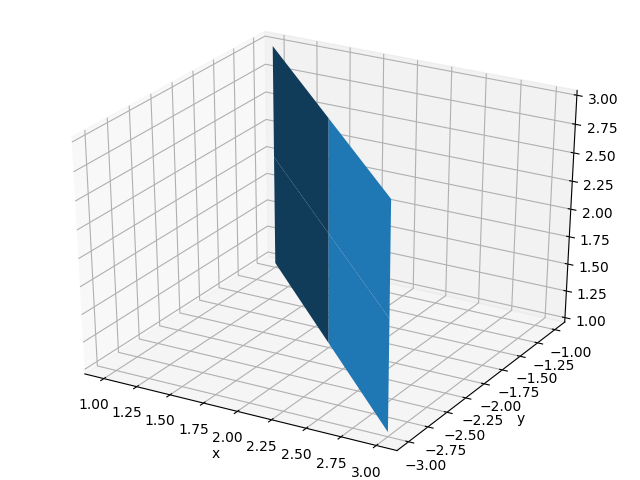

Text(0.5,0,'y')

In [48]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(testX2D2, testY2D2, testZ2D2)
plt.xlabel("x")
plt.ylabel("y")

<IPython.core.display.Javascript object>


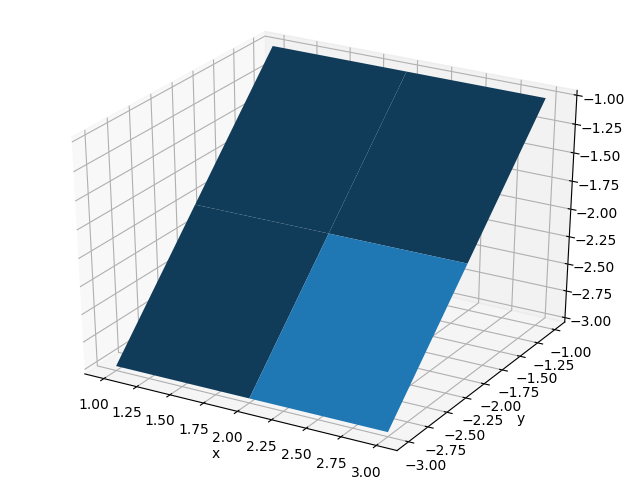

Text(0.5,0,'y')

In [49]:
testX2D2b, testY2D2b, testZ2D2b = rotate(testX2D, testY2D, testZ2D, np.pi/2., np.pi/2)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(testX2D2b, testY2D2b, testZ2D2b)
plt.xlabel("x")
plt.ylabel("y")

## Fit 2D Rotated Parabola


<IPython.core.display.Javascript object>


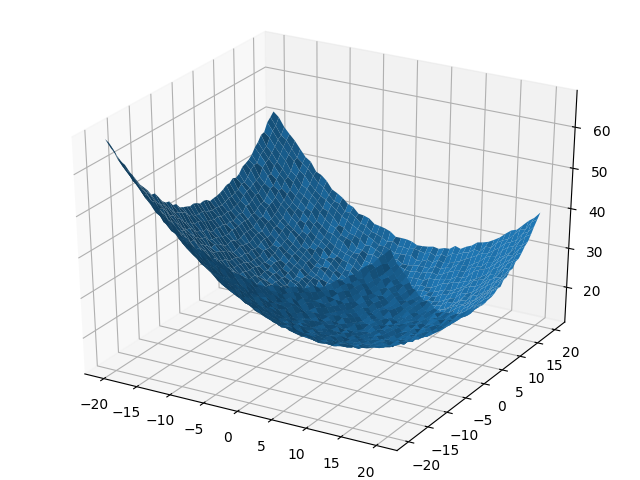

In [66]:
xs2d, ys2d = np.meshgrid(xs, ys)
v1x = 3.0
v1y = 4.0
v2 = 6.0
xRot = 0.
yRot = 0.
zs2d = (1 / (4.*f))*(xs2d  - v1x)**2 +  (1 / (4.*f))*(ys2d - v1y)**2 + (2*v2) + np.random.rand(50, 50)
xdata, ydata, zdata = rotate(xs2d, ys2d, zs2d, xRot, yRot)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xdata, ydata, zdata)

In [67]:
def fun(coeffs, xdata, ydata):
    f = coeffs[0]
    v1x = coeffs[1]
    v1y = coeffs[2]
    v2 = coeffs[3]
    #aroundX = coeffs[4]
    #aroundY = coeffs[5]
    zdata =  (1 / (4.*f))*(xdata - v1x)**2 + (1 / (4.*f))*(ydata - v1y)**2 + (2*v2)
    #_, _, zdataRot = rotate(xdata, ydata, zdata, aroundX, aroundY)
    #return zdataRot
    return zdata


In [68]:
def errfun(coeffs, xdata, ydata, zdata):
    return funOrg(coeffs, xdata, ydata) - zdata

In [69]:
coeffs = [3.5, 2.01, 2.01, 2.01]
r = least_squares(errfun, coeffs, args=(xs2d.flatten(), ys2d.flatten(), data2D.flatten()))
#print r
print r.success
print r.message
print r.nfev
print r.x

True
`gtol` termination condition is satisfied.
6
[ 5.00000000e+00 -2.66754266e-16 -5.91589946e-16  1.53681472e-16]


In [54]:
f


5.0

In [63]:
def funOrg(coeffs, xdata, ydata):
    f = coeffs[0]
    v1x = coeffs[1]
    v1y = coeffs[2]
    v2 = coeffs[3]
    return (1 / (4.*f))*(xdata - v1x)**2 + (1 / (4.*f))*(ydata - v1y)**2 + (2*v2)